In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NFL_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    672 non-null    int64  
 1   Tm      672 non-null    object 
 2   W       672 non-null    int64  
 3   L       672 non-null    int64  
 4   T       672 non-null    int64  
 5   W-L%    672 non-null    float64
 6   PF      672 non-null    int64  
 7   PA      672 non-null    int64  
 8   PD      672 non-null    int64  
 9   MoV     672 non-null    float64
 10  SoS     672 non-null    float64
 11  SRS     672 non-null    float64
 12  OSRS    672 non-null    float64
 13  DSRS    672 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 73.6+ KB


In [4]:
df.head()

,year,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,2022,Buffalo Bills*,13,3,0,0.813,455,286,169,10.6,0.4,10.9,7.1,3.8
1,2022,Miami Dolphins+,9,8,0,0.529,397,399,-2,-0.1,2.0,1.8,2.7,-0.9
2,2022,New England Patriots,8,9,0,0.471,364,347,17,1.0,1.0,2.0,-0.3,2.3
3,2022,New York Jets,7,10,0,0.412,296,316,-20,-1.2,2.0,0.8,-4.0,4.8
4,2022,Cincinnati Bengals*,12,4,0,0.750,418,322,96,6.0,0.9,6.9,5.5,1.4


In [5]:
# replace the space with a lower dash
df.Tm = df.Tm.str.replace(' ', '_')
df.Tm = df.Tm.str.replace('*', '')

df.columns = df.columns.str.lower()

# change the date from object to datetime and save it back to the date column
# convert the date from object to datetime
df.year = pd.to_datetime(df.year, format = '%Y')

# set sale_date as the index
df = df.set_index('year')

# sort the index (sale_date)
df = df.sort_index()



/var/folders/67/bss6mpl54l73122199y9h3r40000gn/T/ipykernel_15654/4063952130.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Tm = df.Tm.str.replace('*', '')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2002-01-01 to 2022-01-01
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tm      672 non-null    object 
 1   w       672 non-null    int64  
 2   l       672 non-null    int64  
 3   t       672 non-null    int64  
 4   w-l%    672 non-null    float64
 5   pf      672 non-null    int64  
 6   pa      672 non-null    int64  
 7   pd      672 non-null    int64  
 8   mov     672 non-null    float64
 9   sos     672 non-null    float64
 10  srs     672 non-null    float64
 11  osrs    672 non-null    float64
 12  dsrs    672 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 73.5+ KB


## Percentage-Based

In [7]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

In [8]:
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

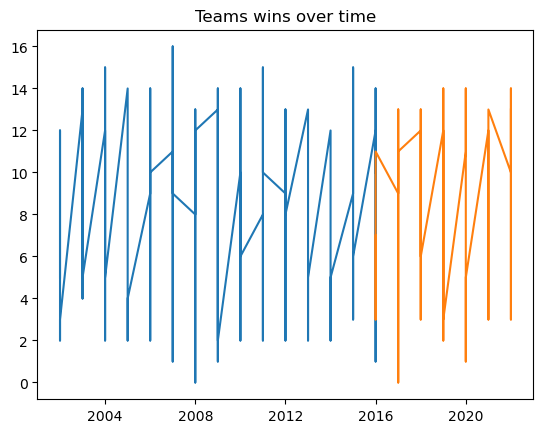

In [10]:
plt.plot(train.w)
plt.plot(test.w)
plt.title('Teams wins over time')
plt.show()

In [11]:
y = train.w
y.head()

year
2002-01-01    5
2002-01-01    9
2002-01-01    9
2002-01-01    9
2002-01-01    8
Name: w, dtype: int64

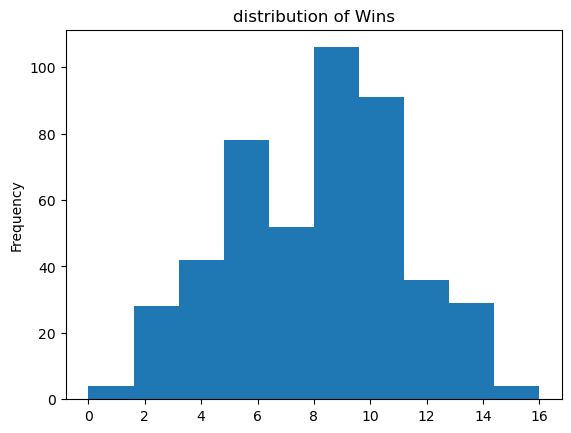

In [12]:
train.w.plot.hist()
plt.title('distribution of Wins')
plt.show()

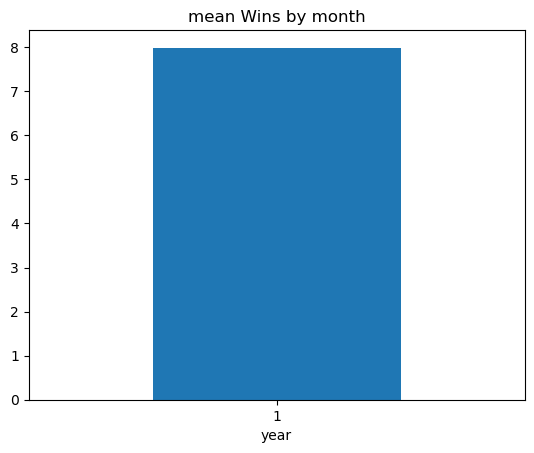

In [13]:
train.groupby(train.index.month).w.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean Wins by month')
plt.show()

In [ ]:
# assign a weekday column from the day_name() method on the datetime index
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week